In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Arun\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_cleaned_outlier_treated.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,kiran residency,sector 56,1.54,8324.0,1850.0,Super Built up area 2000(185.81 sq.m.)Built Up...,3.0,4.0,3+,5.0,South,Old Property,2000.0,1900.0,1850.0,0.0,1.0,0.0,0.0,0.0,1.0,98.0,616.666667
1,house,independent,sohna road,0.07,2527.0,277.0,Plot area 33(27.59 sq.m.),1.0,1.0,0,1.0,NaN,Relatively New,NaN,33.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,277.000000
2,flat,the close north,sector 50,2.70,10365.0,2605.0,Super Built up area 2605(242.01 sq.m.)Built Up...,3.0,3.0,3+,6.0,East,Moderately Old,2605.0,2400.0,2200.0,0.0,1.0,0.0,0.0,0.0,0.0,174.0,868.333333
3,flat,dlf new town heights,sector 90,1.25,6477.0,1930.0,Super Built up area 1930(179.3 sq.m.)Built Up ...,3.0,3.0,3+,6.0,West,Relatively New,1930.0,1929.0,1928.0,0.0,1.0,0.0,1.0,0.0,0.0,136.0,643.333333
4,flat,ss,sector 85,1.19,7121.0,1671.0,Super Built up area 1671(155.24 sq.m.)Built Up...,2.0,2.0,3,11.0,West,Relatively New,1671.0,1670.0,1660.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,835.500000


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 16
facing                 1008
agePossession             0
super_built_up_area    1683
built_up_area          1973
carpet_area            1708
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

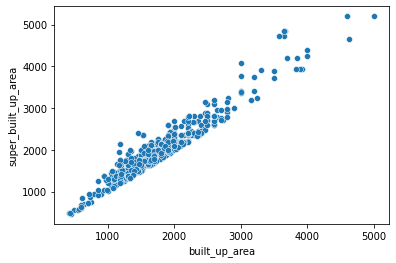

In [6]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

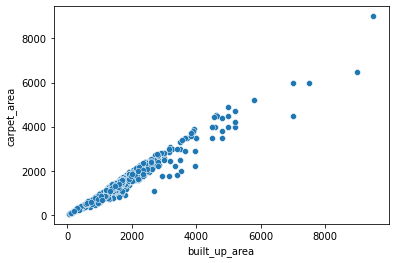

In [7]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [8]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3547    False
3548    False
3549    False
3550    False
3551    False
Length: 3552, dtype: bool

In [9]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [10]:
all_present_df.shape

(528, 24)

In [11]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [12]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [13]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1063815789473685 0.9


In [14]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [15]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
21,flat,m3m heights,sector 65,2.10,16653.0,1261.0,Super Built up area 1261(117.15 sq.m.)Carpet a...,2.0,2.0,3,8.0,NaN,New Property,1261.0,NaN,800.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,630.500000
49,flat,tulip violet,sector 69,1.40,8929.0,1568.0,Super Built up area 1568(145.67 sq.m.)Carpet a...,3.0,3.0,1,12.0,North,Relatively New,1568.0,NaN,1200.0,0.0,0.0,0.0,1.0,0.0,0.0,174.0,522.666667
51,flat,tulip violet,sector 69,1.70,8458.0,2010.0,Super Built up area 2010(186.74 sq.m.)Carpet a...,4.0,4.0,2,10.0,South-West,Relatively New,2010.0,NaN,1610.0,1.0,1.0,1.0,1.0,0.0,0.0,174.0,502.500000
53,flat,dlf regal gardens,sector 90,1.25,10417.0,1200.0,Super Built up area 1702(158.12 sq.m.)Carpet a...,3.0,3.0,3,18.0,North,Moderately Old,1702.0,NaN,1200.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,400.000000
60,flat,indiabulls centrum park,sector 103,2.14,7443.0,2875.0,Super Built up area 2875(267.1 sq.m.)Carpet ar...,4.0,6.0,3+,7.0,East,Relatively New,2875.0,NaN,2550.0,0.0,1.0,0.0,0.0,0.0,0.0,142.0,718.750000


In [16]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

<ipython-input-16-a2fefc960aa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [17]:
df.update(sbc_df)

In [18]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 16
facing                 1008
agePossession             0
super_built_up_area    1683
built_up_area          1553
carpet_area            1708
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [19]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [20]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
7,flat,shapoorji pallonji joyville gurugram,sector 102,1.95,10529.0,1852.0,Super Built up area 1852(172.06 sq.m.),3.0,3.0,3,10.0,North-East,Relatively New,1852.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,59.0,617.333333
12,flat,tulip violet,sector 69,1.60,10139.0,1578.0,Super Built up area 1578(146.6 sq.m.),3.0,3.0,2,0.0,South-West,Relatively New,1578.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,49.0,526.000000
13,flat,godrej nature plus,sector 33,1.35,8671.0,1557.0,Super Built up area 1557(144.65 sq.m.),3.0,2.0,3+,17.0,NaN,New Property,1557.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,38.0,519.000000
16,flat,sare crescent parc royal greens phase 1,sector 92,1.25,5833.0,2143.0,Super Built up area 2143(199.09 sq.m.),4.0,4.0,3,20.0,East,Relatively New,2143.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,60.0,535.750000
17,flat,chd avenue,sector 71,1.10,6790.0,1620.0,Super Built up area 1620(150.5 sq.m.),3.0,3.0,3,11.0,NaN,Relatively New,1620.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,72.0,540.000000


In [21]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

<ipython-input-21-554030e2e595>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [22]:
df.update(sb_df)

In [23]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 16
facing                 1008
agePossession             0
super_built_up_area    1683
built_up_area           680
carpet_area            1708
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [24]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [25]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
6,flat,suncity platinum towers,sector 28,6.00,22346.0,2685.0,Carpet area: 2685 (249.44 sq.m.),3.0,3.0,2,8.0,South-East,Moderately Old,NaN,NaN,2685.0,0.0,1.0,0.0,0.0,0.0,0.0,31.0,895.000000
11,flat,tarc maceo,sector 91,1.80,7759.0,2320.0,Carpet area: 2320 (215.54 sq.m.),3.0,3.0,3+,0.0,North,Relatively New,NaN,NaN,2320.0,0.0,0.0,0.0,1.0,0.0,2.0,45.0,773.333333
14,house,bptp pedestal,sector 70a,0.90,7582.0,1187.0,Carpet area: 1187 (110.28 sq.m.),2.0,2.0,3+,3.0,North-East,New Property,NaN,NaN,1187.0,0.0,1.0,0.0,0.0,1.0,0.0,153.0,593.500000
19,flat,godrej nature plus,sector 33,1.65,8267.0,1996.0,Carpet area: 1996 (185.43 sq.m.),3.0,3.0,3,2.0,NaN,Under Construction,NaN,NaN,1996.0,0.0,1.0,0.0,0.0,0.0,0.0,37.0,665.333333
26,flat,sonata group housing gh 24,manesar,1.65,5893.0,2800.0,Carpet area: 2800 (260.13 sq.m.),4.0,3.0,3,8.0,NaN,New Property,NaN,NaN,2800.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0,700.000000


In [26]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

<ipython-input-26-747bc7ee3c0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [27]:
df.update(c_df)

In [28]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 16
facing                 1008
agePossession             0
super_built_up_area    1683
built_up_area             0
carpet_area            1708
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

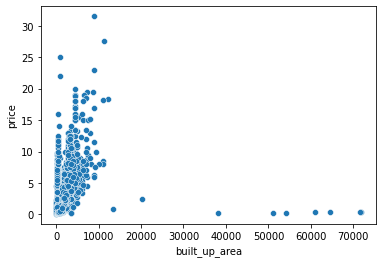

In [29]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [30]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [31]:
anamoly_df.sample(5)

,price,area,built_up_area
2527,3.15,1548.0,1548.0
1868,2.51,1696.0,1534.0
2594,7.35,1760.0,240.0
1585,3.65,1557.0,1557.0
209,3.15,2153.0,222.0


In [32]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [33]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

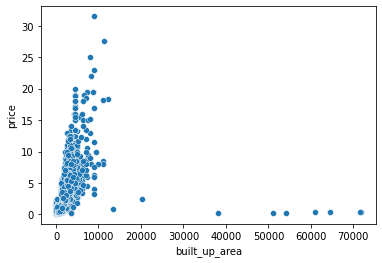

In [34]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [35]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'],inplace=True)

In [36]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,kiran residency,sector 56,1.54,8324.0,3.0,4.0,3+,5.0,South,Old Property,1900.0,0.0,1.0,0.0,0.0,0.0,1.0,98.0,616.666667
1,house,independent,sohna road,0.07,2527.0,1.0,1.0,0,1.0,NaN,Relatively New,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,277.000000
2,flat,the close north,sector 50,2.70,10365.0,3.0,3.0,3+,6.0,East,Moderately Old,2400.0,0.0,1.0,0.0,0.0,0.0,0.0,174.0,868.333333
3,flat,dlf new town heights,sector 90,1.25,6477.0,3.0,3.0,3+,6.0,West,Relatively New,1929.0,0.0,1.0,0.0,1.0,0.0,0.0,136.0,643.333333
4,flat,ss,sector 85,1.19,7121.0,2.0,2.0,3,11.0,West,Relatively New,1670.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,835.500000


In [37]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             16
facing             1008
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
area_room_ratio       0
dtype: int64

### floorNum

In [38]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
38,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,0.0,88.0,810.000000
117,house,independent,sector 25,13.00,45710.0,6.0,8.0,3+,NaN,NaN,Relatively New,2844.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,474.000000
389,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2317.500000
523,house,independent,sector 26,4.60,12198.0,4.0,4.0,3+,NaN,NaN,Old Property,3771.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,942.750000
1197,flat,experion heartsong,dwarka expressway,1.08,6150.0,3.0,3.0,No,NaN,NaN,Under Construction,1758.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,585.333333
1857,house,emaar mgf marbella,sector 66,9.00,21251.0,4.0,4.0,3+,NaN,South-West,Relatively New,5200.0,0.0,1.0,1.0,1.0,0.0,1.0,114.0,1058.750000
2087,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.000000
2161,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,1,NaN,NaN,Relatively New,3240.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,810.000000
3040,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,486.000000
3067,house,ansal sushant lok,sector 43,10.50,27911.0,4.0,4.0,2,NaN,North-East,Old Property,3762.0,0.0,1.0,0.0,0.0,0.0,0.0,59.0,940.500000


In [39]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [40]:
df['floorNum'].fillna(2.0,inplace=True)

In [41]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1008
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
area_room_ratio       0
dtype: int64

In [42]:
1011/df.shape[0]

0.2846283783783784

### facing

<Axes: ylabel='count'>

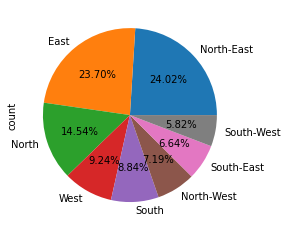

In [43]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [44]:
df.drop(columns=['facing'],inplace=True)

In [45]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
793,flat,orchid petals,sector 49,4.79,11629.0,5.0,5.0,3+,14.0,Relatively New,3724.0,1.0,1.0,0.0,1.0,0.0,0.0,49.0,823.80
1424,house,independent,sector 3,0.80,8155.0,2.0,4.0,1,2.0,Moderately Old,981.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,490.50
2630,flat,ramsons kshitij,sector 95,0.32,4501.0,2.0,2.0,1,8.0,Relatively New,563.0,0.0,0.0,0.0,0.0,1.0,2.0,28.0,355.50
2247,house,sai kripa floors 5,sector 11,0.90,11250.0,2.0,5.0,3,3.0,Relatively New,800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400.00
3398,house,independent,sector 56,2.99,20635.0,4.0,4.0,2,2.0,Moderately Old,1449.0,1.0,1.0,0.0,1.0,0.0,1.0,49.0,362.25


In [46]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
area_room_ratio    0
dtype: int64

In [47]:
df.drop(index=[2536],inplace=True)

In [48]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
area_room_ratio    0
dtype: int64

### agePossession

In [49]:
df['agePossession'].value_counts()

agePossession
Relatively New        1611
New Property           557
Moderately Old         538
Old Property           292
Undefined              288
Under Construction     265
Name: count, dtype: int64

In [50]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
10,house,independent,sector 2,0.70,7778.0,1.0,1.0,0,1.0,Undefined,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.000000
35,house,independent,sector 13,0.45,4808.0,1.0,1.0,0,1.0,Undefined,936.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,936.000000
48,house,independent,sector 37d,1.16,7537.0,1.0,1.0,0,1.0,Undefined,1535.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1539.000000
65,flat,central park flower valley,sohna road,1.20,6742.0,3.0,3.0,No,11.0,Undefined,1780.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,593.333333
68,house,unitech espace,sector 50,11.50,35494.0,5.0,6.0,0,1.0,Undefined,3240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,648.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3530,flat,raheja navodaya,sector 92,1.10,4681.0,3.0,2.0,3,0.0,Undefined,2350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,783.333333
3531,flat,vatika independent floors,sector 82,1.45,8056.0,4.0,3.0,No,1.0,Undefined,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,450.000000
3535,house,independent,sector 4,0.47,3518.0,3.0,4.0,0,3.0,Undefined,1350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,445.333333
3542,house,independent,sector 17,3.50,24306.0,2.0,6.0,3+,3.0,Undefined,1440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720.000000


In [51]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [52]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [53]:
df['agePossession'].value_counts()

agePossession
Relatively New        1735
New Property           584
Moderately Old         578
Old Property           324
Under Construction     279
Undefined               51
Name: count, dtype: int64

In [54]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [55]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [56]:
df['agePossession'].value_counts()

agePossession
Relatively New        1744
New Property           585
Moderately Old         584
Old Property           334
Under Construction     279
Undefined               25
Name: count, dtype: int64

In [57]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [58]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [59]:
df['agePossession'].value_counts()

agePossession
Relatively New        1746
Moderately Old         607
New Property           585
Old Property           334
Under Construction     279
Name: count, dtype: int64

In [60]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
area_room_ratio    0
dtype: int64

In [61]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [62]:
df.shape

(3551, 19)